In [1]:
# !pip install wordcloud

In [2]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
import sys
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading file
tweets_df = pd.read_csv("covid19_tweets.csv")

# 1.Data Exploration


In [4]:
# looking at the shape of the datset , it shows it has 179108 records
tweets_df.shape

(179108, 13)

In [5]:
# Most the column are of type string(object) ,
# user_followers, user_friends ,user_favourites are of type integers ,
# user_verified and retweet  are of tyep boolean
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [6]:
tweets_df.describe()

user_followers   user_friends  user_favourites
count    1.791080e+05  179108.000000     1.791080e+05
mean     1.090555e+05    2121.701566     1.444411e+04
std      8.414670e+05    9162.553072     4.452270e+04
min      0.000000e+00       0.000000     0.000000e+00
25%      1.720000e+02     148.000000     2.060000e+02
50%      9.920000e+02     542.000000     1.791000e+03
75%      5.284000e+03    1725.250000     9.388000e+03
max      4.944256e+07  497363.000000     2.047197e+06

In [7]:
tweets_df.head(10)

user_name               user_location  \
0                             ᏉᎥ☻լꂅϮ                  astroworld   
1                      Tom Basile 🇺🇸                New York, NY   
2                    Time4fisticuffs            Pewee Valley, KY   
3                        ethel mertz        Stuck in the Middle    
4                           DIPR-J&K           Jammu and Kashmir   
5                   🎹 Franz Schubert                 Новоро́ссия   
6                       hr bartender             Gainesville, FL   
7                     Derbyshire LPC                         NaN   
8                  Prathamesh Bendre                         NaN   
9  Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺  👇🏻location at link below👇🏻   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   
5  🎼  #Новоро́ссия #Novorossiya #оставайсядома #S...  2018-03-19 16:29:52   
6  Workplace tips and advice served up in a frien...  2008-08-12 18:19:49   
7                                                NaN  2012-02-03 18:08:10   
8   A poet, reiki practitioner and a student of law.  2015-04-25 08:15:41   
9  Just as the body is one & has many members, & ...  2014-08-17 04:53:22   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   
5            1180          1071             1287          False   
6           79956         54810             3801          False   
7             608           355               95          False   
8              25            29               18          False   
9           55201         34239            29802          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   
5  2020-07-25 12:27:06  #coronavirus #covid19 deaths continue to rise....   
6  2020-07-25 12:27:03  How #COVID19 Will Change Work in General (and ...   
7  2020-07-25 12:27:00  You now have to wear face coverings when out s...   
8  2020-07-25 12:26:59  Praying for good health and recovery of @Chouh...   
9  2020-07-25 12:26:54  POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False  
5         ['coronavirus', 'covid19']      Twitter Web App       False  
6          ['COVID19', 'Recruiting']               Buffer       False  
7                                NaN            TweetDeck       False  
8       ['covid19', 'covidPositive']  Twitter for Android       False  
9      ['HurricaneHanna', 'COVID19']   Twitter for iPhone       False

In [8]:
tweets_df.tail(10)

user_name                   user_location  \
179098               John Geer                             NaN   
179099              amyracecar  la playa, el mar .. mi corazón   
179100           Lori Comstock                      Newton, NJ   
179101       New Jersey Herald                      Newton, NJ   
179102                    Pris                            T.O.   
179103  AJIMATI AbdulRahman O.                 Ilorin, Nigeria   
179104                   Jason                         Ontario   
179105             BEEHEMOTH ⏳                       🇨🇦 Canada   
179106           Gary DelPonte                   New York City   
179107                 TUKY II      Aliwal North, South Africa   

                                         user_description  \
179098  #StayAtHome #StayAtHomeSaveLifes #MaskUp \nFor...   
179099       culinary wizard, auto mechanic, and botanist   
179100  @njherald reporter || chasing crime and coveri...   
179101  The New Jersey Herald, a daily newspaper in Ne...   
179102  A/V/L Techie, camera op. but twitter has becom...   
179103    Animal Scientist|| Muslim|| Real Madrid/Chelsea   
179104  When your cat has more baking soda than Ninja ...   
179105  ⚒️ The Architects of Free Trade ⚒️ Really Did ...   
179106  Global UX UI Visual Designer. StoryTeller, Mus...   
179107  TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...   

               user_created  user_followers  user_friends  user_favourites  \
179098  2020-04-18 01:55:14              61           168            10817   
179099  2014-02-06 00:55:53             128           542             3506   
179100  2015-05-27 16:35:15             335            44               99   
179101  2010-01-07 18:19:37            6274           162               38   
179102  2008-12-31 16:16:12             251           160              627   
179103  2013-12-30 18:59:19             412          1609             1062   
179104  2011-12-21 04:41:30             150           182             7295   
179105  2016-07-13 17:21:59            1623          2160            98000   
179106  2009-10-27 17:43:13            1338          1111                0   
179107  2018-04-14 17:30:07              97          1697              566   

        user_verified                 date  \
179098          False  2020-08-29 19:44:34   
179099          False  2020-08-29 19:44:34   
179100          False  2020-08-29 19:44:27   
179101          False  2020-08-29 19:44:27   
179102          False  2020-08-29 19:44:23   
179103          False  2020-08-29 19:44:21   
179104          False  2020-08-29 19:44:16   
179105          False  2020-08-29 19:44:15   
179106          False  2020-08-29 19:44:14   
179107          False  2020-08-29 19:44:08   

                                                     text  \
179098  Report #COVID19 outbreaks in K-12 schools here...   
179099  I have NOTHING BUT 💚 for the @NBA these days.....   
179100  Wallkill school nurse adds COVID-19 monitoring...   
179101  Wallkill school nurse adds COVID-19 monitoring...   
179102  we have reached 25mil cases of #covid19, world...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179105  @CTVNews A powerful painting by Juan Lucena. I...   
179106  More than 1,200 students test positive for #CO...   
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...   

                                                 hashtags  \
179098  ['COVID19', 'CloseTheSchools', 'KeepTheSchools...   
179099                                        ['Covid19']   
179100    ['nurses', 'COVID19', 'coronavirus', 'schools']   
179101    ['nurses', 'COVID19', 'coronavirus', 'schools']   
179102                                        ['covid19']   
179103                                      ['WearAMask']   
179104                                        ['COVID19']   
179105                                                NaN   
179106                             

In [9]:
tweets_df.shape

(179108, 13)

In [10]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [11]:
tweets_df.isnull().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

In [12]:
# Removng unnecessary columns such asuser decription,user followers, friends ,user favourites,and sources.
droppingColumns=["user_description","user_followers","user_friends",
                 "user_favourites","user_verified","user_created","source","is_retweet"]
tweets_df.drop(droppingColumns,axis=1,inplace=True)


In [13]:
# looking if changes have been applied
tweets_df.head(5)

user_name         user_location                 date  \
0           ᏉᎥ☻լꂅϮ            astroworld  2020-07-25 12:27:21   
1    Tom Basile 🇺🇸          New York, NY  2020-07-25 12:27:17   
2  Time4fisticuffs      Pewee Valley, KY  2020-07-25 12:27:14   
3      ethel mertz  Stuck in the Middle   2020-07-25 12:27:10   
4         DIPR-J&K     Jammu and Kashmir  2020-07-25 12:27:08   

                                                text  \
0  If I smelled the scent of hand sanitizers toda...   
1  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  @brookbanktv The one gift #COVID19 has give me...   
4  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags  
0                                NaN  
1                                NaN  
2                        ['COVID19']  
3                        ['COVID19']  
4  ['CoronaVirusUpdates', 'COVID19']

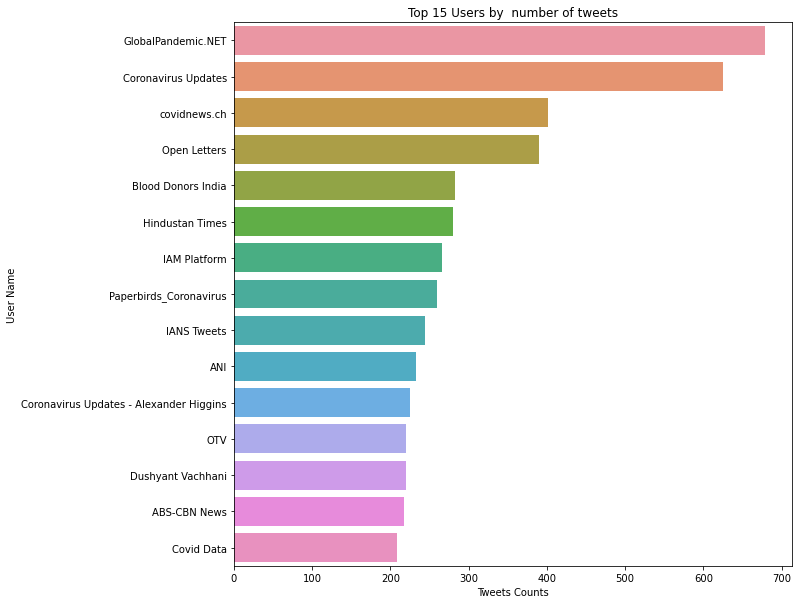

In [14]:
# Exploring top 15 users by number of tweets

plt.figure(figsize=(10,10))
sns.barplot(tweets_df['user_name'].value_counts().values[0:15],
           tweets_df['user_name'].value_counts().index[0:15]);
plt.title("Top 15 Users by  number of tweets")
plt.xlabel("Tweets Counts")
plt.ylabel("User Name")
plt.show()


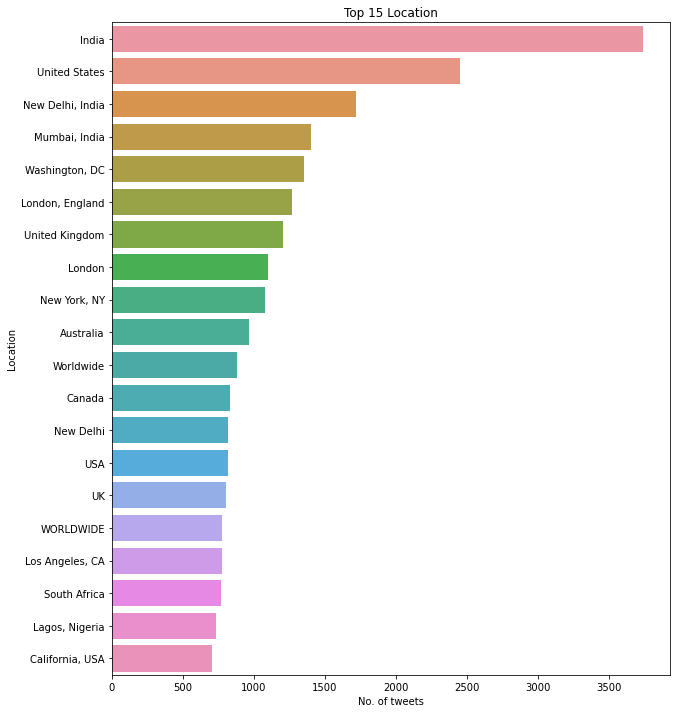

In [15]:
# which are top 20 locations for number of tweets
plt.figure(figsize=(10,12))
sns.barplot(tweets_df["user_location"].value_counts().values[0:20],
          tweets_df["user_location"].value_counts().index[0:20]);
plt.title("Top 15 Location")
plt.xlabel("No. of tweets")
plt.ylabel("Location")
plt.show()

In [16]:
# looking at the top locations , in order to get the anme of loactions and 
# applying strip to remove whitespaces from beg and end of each loactions
tweets_df['user_location'] = tweets_df['user_location'].str.strip()
tweets_df['user_location'].value_counts()[0:60]

India                         3803
United States                 2470
New Delhi, India              1729
Mumbai, India                 1403
Washington, DC                1373
London, England               1272
United Kingdom                1226
London                        1135
New York, NY                  1098
Australia                      989
Worldwide                      887
USA                            848
Canada                         846
New Delhi                      832
UK                             812
South Africa                   789
Los Angeles, CA                779
WORLDWIDE                      777
Lagos, Nigeria                 743
California, USA                712
Global                         704
Nairobi, Kenya                 621
Nigeria                        602
Atlanta, GA                    579
Chicago, IL                    564
Switzerland                    551
Earth                          546
Mumbai                         540
Johannesburg, South 

In [140]:
# Cleaning the loctaion column by combining the locations of each country .
# Run this code two timess in order for teh changes to be applied.


Aust_list = ['Melbourne, Victoria','Sydney, Australia','Sydney, New South Wales',
                  'Sydney, New South Wales','Melbourne, Australia','Australia, Australia','Melbourne','Canberra','Brisbane, Queensland','Sydney']

tweets_df['user_location'] = tweets_df['user_location'].str.replace('|'.join(Aust_list),'Australia')

US_list = ['Texas, USA','Seattle, WA','New York, USA','Texas, USA','Washington, DC','New York, NY','Los Angeles, CA','USA','California, USA','Atlanta, GA','Chicago, IL',
            'Boston, MA','New York','San Francisco, CA','Texas, United States',
            'Houston, TX','Florida, United States','Seattle, WA','San Diego, CA',
           'Washington, D.C.','Austin, TX','New York, United States','Text RESIST to 50409',
            'Texas','United States, United States','NYC','astroworld','New Jersey, United States','Las Vegas, NV',
           'United States City','Philadelphia, PA','New Jersey, United States','Los Angeles','California','New Jersey, United States',
            'United States, United States','United States City', 'Pewee Valley, KY','Global','Earth','Worldwide',
            'WORLDWIDE','Stuck in the Middle','535 Radio Lane, Henderson, NC','Shoreview, MN','Nashville, TN | Tucson','United States|United States, AZ',
            'Everywhere! ','Florida, United States','Florida, United States','United States City','Planet Location Unknown',
           'New Jersey, United States','Florida','Brooklyn, NY','United States','Baltimore, MD','New Orleans, Louisiana',
           'Virginia, United States','Raleigh, NC','Memphis, TN','Ohio, United States','North Carolina, United States',
           'Buffalo, NY','Ohio, United States','Sacramento, CA','Sacramento, CA','Oakland, CA',
           'United States, United States','Michigan, United States','Manhattan, NY','Washington DC','Planet United States','Michigan, United States ','United States ','Pennsylvania, United States','Georgia, United States','New Jersey, United States','Planet United States','United States City','United States']


tweets_df['user_location'] = tweets_df['user_location'].str.replace('|'.join(US_list),'United States')
tweets_df['user_location'] = tweets_df['user_location'].str.replace('United States  United States','United States')
tweets_df['user_location'] = tweets_df['user_location'].str.replace('United States, United States','United States')
canada_list= ['Toronto, Ontario','Toronto','Ontario, Canada','Canada, Canada','Canada, Canada','Vancouver',
              'Vancouver, British Columbia','Canada  Canada','Canada, British Columbia','Canada, BC']
tweets_df['user_location'] = tweets_df['user_location'].str.replace('|'.join(canada_list),'Canada')

India_list=['New Delhi, India','Mumbai, India','Chennai, India',
              'Hyderabad, India','Bhubaneshwar, India','Bengaluru, India',
              'New Delhi','Mumbai','Chennai','Bhubaneswar','Jammu And Kashmir'
             'Guwahati, India','Odisha','Pune, India','Bangalore','India, India',
             'India India . India . ','India, India','Jammu And Kashmir','Hyderabad',
             'Jaipur, India','INDIA','Maharashtra, India','Delhi','India','Kolkata, India',
              'BENGALURU','Ahmadabad City, India','India, India','Guwahati  India','Guwahati, India','Guwahati, India','Chandigarh, India','Gujarat, India','India, India ','Noida, India','India','Guwahati, India','Gujarat, India','Kerala, India']

tweets_df['user_location'] = tweets_df['user_location'].str.replace('|'.join(India_list),'India')

UK_list =['London, England','London','UK','London, UK','England, United Kingdom','United Kingdom, United Kingdom','United Kingdom  United Kingdom']
tweets_df['user_location'] = tweets_df['user_location'].str.replace('|'.join(UK_list),'United Kingdom')
tweets_df['user_location'] = tweets_df['user_location'].str.replace('United Kingdom, United Kingdom','United Kingdom')


SouthAfrica_list = ['Johannesburg  South Africa','Cape Town  South Africa','Johannesburg, South Africa','Pretoria, South Africa','Cape Town, South Africa']

tweets_df['user_location'] = tweets_df['user_location'].str.replace('|'.join(SouthAfrica_list),'South Africa')
Philippines_list = ['Manila, Philippines']

tweets_df['user_location'] = tweets_df['user_location'].str.replace('|'.join(Philippines_list),'Philippines')
UAE_list =['Dubai, United Arab Emirates','United Arab Emirates','Dubai']
tweets_df['user_location'] = tweets_df['user_location'].str.replace('|'.join(UAE_list),'United Arab Emirates')

Nigeria_list =['Lagos, Nigeria','Nigeria','Abuja, Nigeria']
tweets_df['user_location'] = tweets_df['user_location'].str.replace('|'.join(Nigeria_list),'Nigeria')
tweets_df['user_location'] = tweets_df['user_location'].str.replace('Abuja, Nigeria','Nigeria')


Kenya_list =['Kenya','Nairobi, Kenya']
tweets_df['user_location'] = tweets_df['user_location'].str.replace('|'.join(Kenya_list),'Kenya')


In [141]:
tweets_df['user_location'].value_counts()[0:10]

United States     20547
India             13847
United Kingdom     5424
Australia          3123
Canada             2499
South Africa       1667
Nigeria            1545
Kenya               931
Philippines         741
Switzerland         551
Name: user_location, dtype: int64

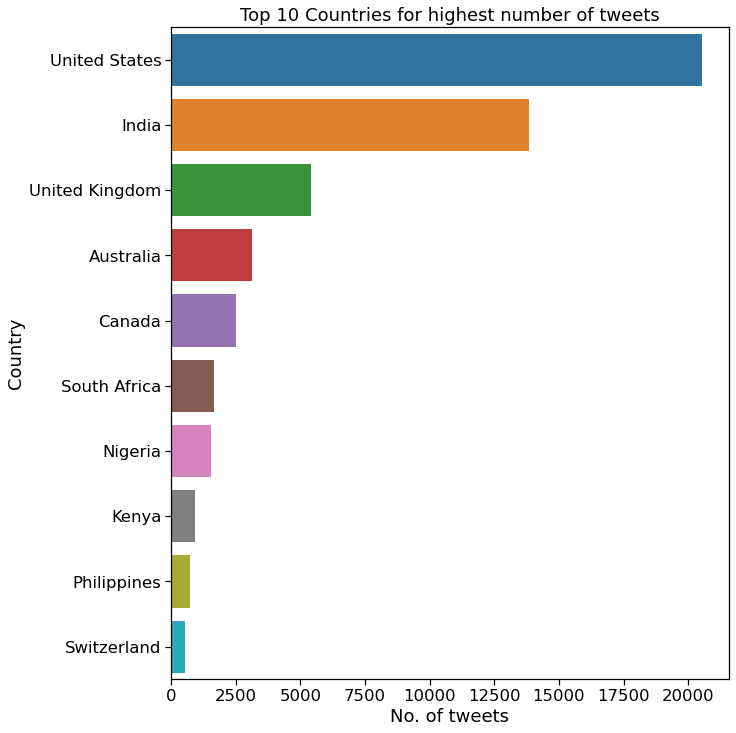

In [142]:
# which are top 10 Countries for number of tweets after cleaning
plt.figure(figsize=(10,12))
sns.barplot(tweets_df["user_location"].value_counts().values[0:10],
          tweets_df["user_location"].value_counts().index[0:10]);
plt.title("Top 10 Countries for highest number of tweets")
plt.xlabel("No. of tweets")
plt.ylabel("Country")
plt.show()

In [20]:
tweets_df.head(10)

user_name               user_location  \
0                             ᏉᎥ☻լꂅϮ               United States   
1                      Tom Basile 🇺🇸               United States   
2                    Time4fisticuffs               United States   
3                        ethel mertz               United States   
4                           DIPR-J&K           Jammu and Kashmir   
5                   🎹 Franz Schubert                 Новоро́ссия   
6                       hr bartender             Gainesville, FL   
7                     Derbyshire LPC                         NaN   
8                  Prathamesh Bendre                         NaN   
9  Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺  👇🏻location at link below👇🏻   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   
5  2020-07-25 12:27:06  #coronavirus #covid19 deaths continue to rise....   
6  2020-07-25 12:27:03  How #COVID19 Will Change Work in General (and ...   
7  2020-07-25 12:27:00  You now have to wear face coverings when out s...   
8  2020-07-25 12:26:59  Praying for good health and recovery of @Chouh...   
9  2020-07-25 12:26:54  POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...   

                            hashtags  
0                                NaN  
1                                NaN  
2                        ['COVID19']  
3                        ['COVID19']  
4  ['CoronaVirusUpdates', 'COVID19']  
5         ['coronavirus', 'covid19']  
6          ['COVID19', 'Recruiting']  
7                                NaN  
8       ['covid19', 'covidPositive']  
9      ['HurricaneHanna', 'COVID19']

In [21]:
tweets_df["n_of_texts"] = tweets_df["text"].apply(lambda x: len(x))

In [22]:
tweets_df["n_of_texts"].describe()

count    179108.000000
mean        130.517598
std          19.455022
min          13.000000
25%         131.000000
50%         140.000000
75%         140.000000
max         169.000000
Name: n_of_texts, dtype: float64

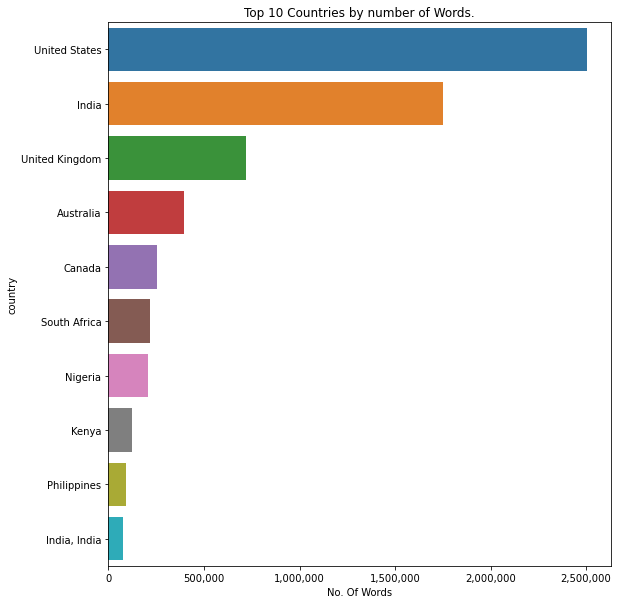

In [23]:
import matplotlib as mpl
plt.figure(figsize=(9,10))
num_texts = pd.DataFrame()
num_texts["user_location"] = tweets_df["user_location"]
num_texts["n_of_texts"] = tweets_df["n_of_texts"]

num_texts = num_texts.sort_values(by = "n_of_texts",ascending=False)
num_texts = num_texts.groupby("user_location").sum().sort_values(by = "n_of_texts",ascending=False)[:10]

ax=sns.barplot(list(num_texts.values.flatten()),num_texts.index,)
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Top 10 Countries by number of Words.")
plt.xlabel("No. Of Words")
plt.ylabel("country")
plt.show()

## Wordcloud before data preprocessing.

Wall time: 1.88 s


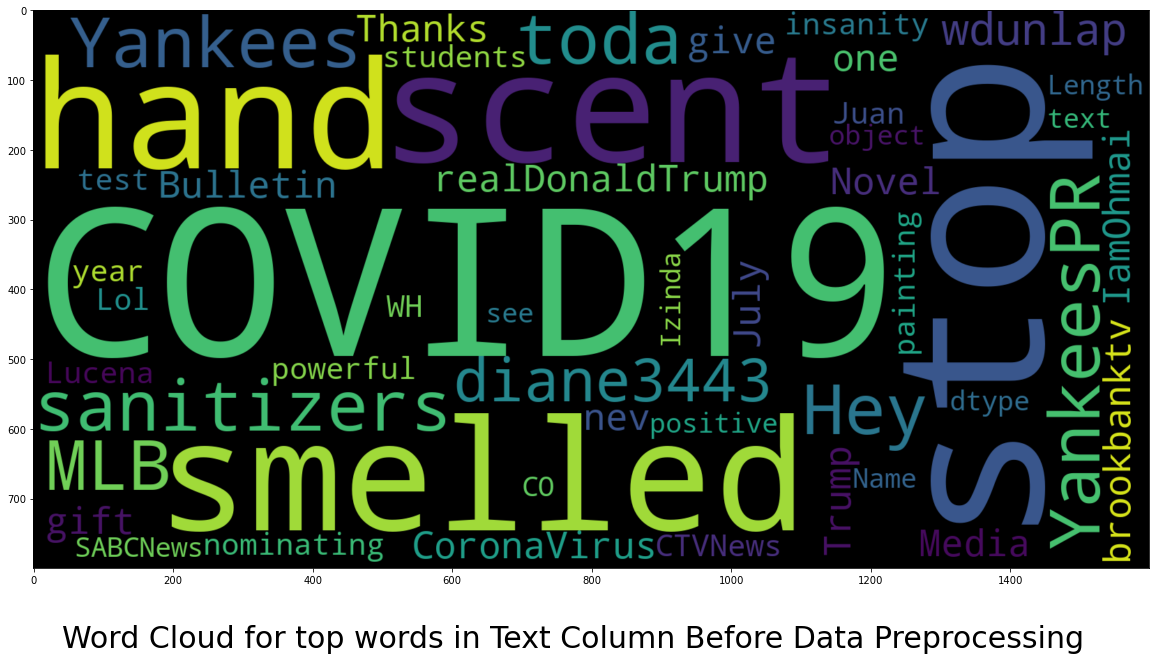

In [24]:
%%time
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 50 , width = 1600 , height = 800).generate(str(tweets_df['text']))
plt.suptitle('Word Cloud for top words in Text Column Before Data Preprocessing', fontsize=30)
plt.subplots_adjust(top=2.3)
plt.imshow(wc , interpolation = 'bilinear')


# Distribution of N-grams
### N-gram is the number of words used as observation points. For example, unigram means a single worded, bigram means 2 worded phrase and trigram mean 3 worded phrases 


In [25]:
# function to get ngrams
# https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus,ngram_range, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [26]:
unigrams = get_top_n_words(tweets_df['text'],(1,1),20)

In [27]:
df_unigrams = pd.DataFrame(unigrams, columns = ['Text' , 'count']) #Creating df

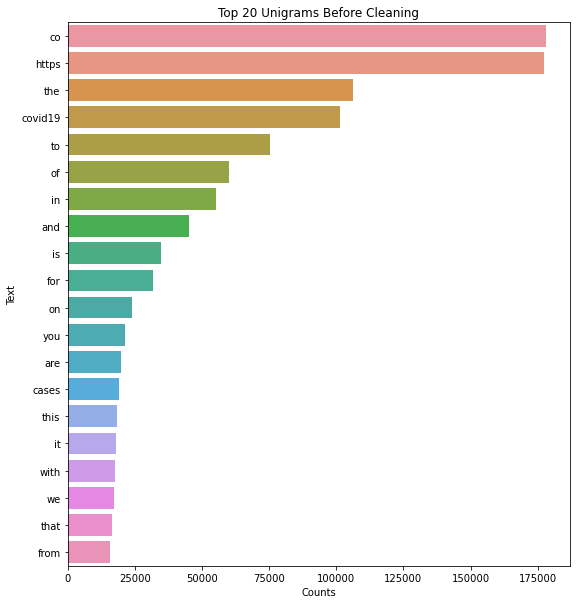

In [28]:
#Plotting top 20 
plt.figure(figsize=(9,10))
sns.barplot(df_unigrams["count"],df_unigrams["Text"])
plt.title("Top 20 Unigrams Before Cleaning")
plt.xlabel("Counts")
plt.ylabel("Text")
plt.show()

In [29]:
bigrams = get_top_n_words(tweets_df['text'],(2,2),20)

In [30]:
#Creating df
df_bigrams = pd.DataFrame(bigrams, columns = ['Text' , 'count']) 

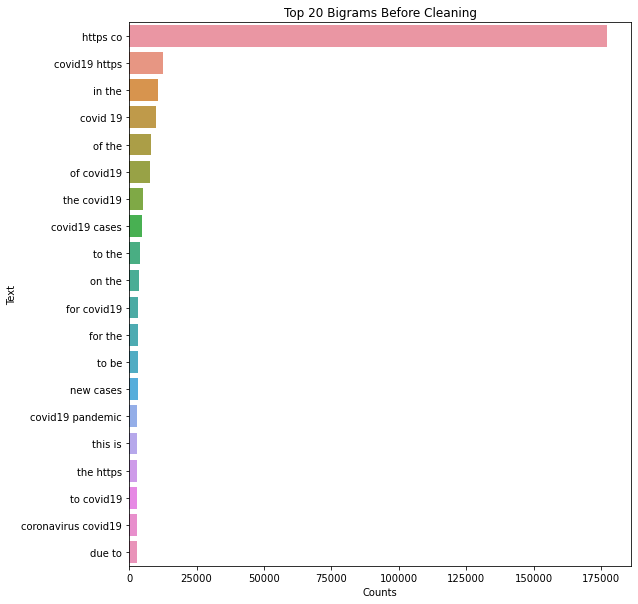

In [31]:
#Plotting top 20 
plt.figure(figsize=(9,10))
sns.barplot(df_bigrams["count"],df_bigrams["Text"])
plt.title("Top 20 Bigrams Before Cleaning")
plt.xlabel("Counts")
plt.ylabel("Text")
plt.show()

In [143]:
trigrams = get_top_n_words(tweets_df['text'],(3,3),20)
#Creating df
df_trigrams = pd.DataFrame(trigrams, columns = ['Text' , 'count']) 


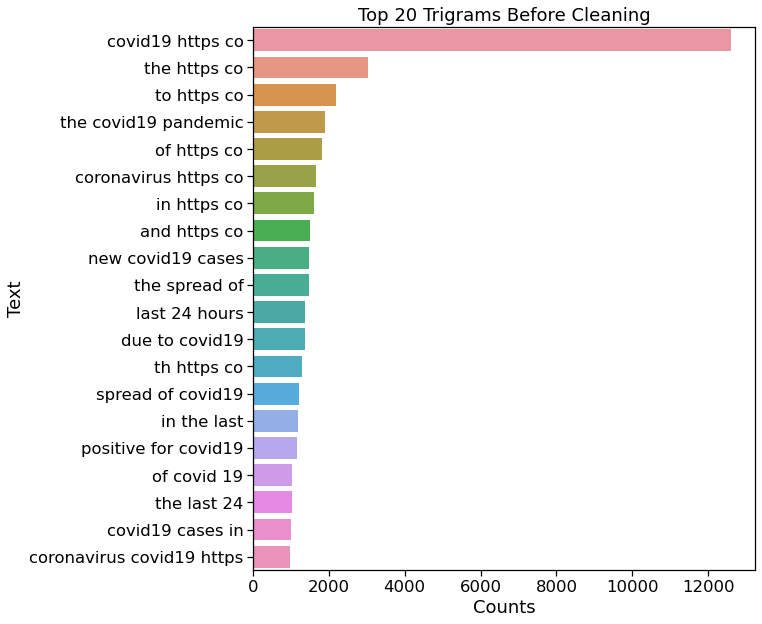

In [144]:
#Plotting top 20 
plt.figure(figsize=(9,10))
sns.barplot(df_trigrams["count"],df_trigrams["Text"])
plt.title("Top 20 Trigrams Before Cleaning")
plt.xlabel("Counts")
plt.ylabel("Text")
plt.show()

# 2.Data preprocessing

### converting emjis and emoticons to words

In [34]:
# Source https://github.com/NeelShah18/emot/blob/master/emot/test.py
# pip install emoji
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
# :-) is an emoticon

# 😀 is an emoji

In [35]:
#converting Emoticon into word form
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

In [36]:
%%time
tweets_df["EmoticonsIntoWords"]=tweets_df["text"].apply(convert_emoticons)

Wall time: 1min 17s


In [37]:
#converting Emojis into word form
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
    return text

In [38]:
%%time
tweets_df["EmoticonsAndEmojisIntoWords"]=tweets_df["EmoticonsIntoWords"].apply(convert_emoticons)

Wall time: 1min 19s


### Reamoving URLs,punctuation,hashtags etc.

In [39]:
# Creating a function for cleaning the column text

def cleanTextColumn(text):
    text= text.lower()  # Making text to lower case
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+|www\.\S+', '', text) # Removing hyperlink 
    text = re.sub('[.?"\'`\,\-\!:;\(\)\[\]\\/“”]+?', '', text) #removing punctuation
    text = re.sub(r'[0-9]+','',text) #Reemoving numbers
    text = re.sub('\n', '', text)
    text= re.sub('amp','',text)
    text = re.sub('\[.*?\]', '', text) #remove text from in suqare brackets
    
 
    return text

In [40]:
# applying the above method to the text column
tweets_df["Cleanedtext"]=tweets_df["text"].apply(cleanTextColumn)

### Reamoving StopWords

In [41]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
CleanedTexts = tweets_df["Cleanedtext"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [42]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
CleanedTexts

0         smelled scent hand sanitizers today someone pa...
1                wouldnt made sense players pay respects a…
2           trump never claimed covid hoax claim effort to…
3         one gift covid give appreciation simple things...
4         july media bulletin novel coronavirusupdates c...
                                ...                        
179103    thanks nominating wearamask challengei nominat...
179104                              year insanity lol covid
179105    powerful painting juan lucena tribute grandpar...
179106    students test positive covid major university ...
179107                              stop see stop_ent_sabc…
Name: Cleanedtext, Length: 179108, dtype: object

### Tokenizing 

In [44]:
tokenized_tweet = CleanedTexts.apply(lambda x: x.split())

In [45]:
tokenized_tweet.head()

0    [smelled, scent, hand, sanitizers, today, some...
1    [wouldnt, made, sense, players, pay, respects,...
2    [trump, never, claimed, covid, hoax, claim, ef...
3    [one, gift, covid, give, appreciation, simple,...
4    [july, media, bulletin, novel, coronavirusupda...
Name: Cleanedtext, dtype: object

### Stemming

In [46]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [smell, scent, hand, sanit, today, someon, pas...
1      [wouldnt, made, sens, player, pay, respect, a…]
2    [trump, never, claim, covid, hoax, claim, effo...
3    [one, gift, covid, give, appreci, simpl, thing...
4    [juli, media, bulletin, novel, coronavirusupd,...
Name: Cleanedtext, dtype: object

In [47]:
#Joining the tokenized tweets
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tweets_df['tidy_tweet'] = tokenized_tweet


In [48]:
tweets_df.head(10)

user_name               user_location  \
0                             ᏉᎥ☻լꂅϮ               United States   
1                      Tom Basile 🇺🇸               United States   
2                    Time4fisticuffs               United States   
3                        ethel mertz               United States   
4                           DIPR-J&K           Jammu and Kashmir   
5                   🎹 Franz Schubert                 Новоро́ссия   
6                       hr bartender             Gainesville, FL   
7                     Derbyshire LPC                         NaN   
8                  Prathamesh Bendre                         NaN   
9  Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺  👇🏻location at link below👇🏻   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   
5  2020-07-25 12:27:06  #coronavirus #covid19 deaths continue to rise....   
6  2020-07-25 12:27:03  How #COVID19 Will Change Work in General (and ...   
7  2020-07-25 12:27:00  You now have to wear face coverings when out s...   
8  2020-07-25 12:26:59  Praying for good health and recovery of @Chouh...   
9  2020-07-25 12:26:54  POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...   

                            hashtags  n_of_texts  \
0                                NaN         140   
1                                NaN         140   
2                        ['COVID19']         140   
3                        ['COVID19']         139   
4  ['CoronaVirusUpdates', 'COVID19']         138   
5         ['coronavirus', 'covid19']         140   
6          ['COVID19', 'Recruiting']         130   
7                                NaN         135   
8       ['covid19', 'covidPositive']          81   
9      ['HurricaneHanna', 'COVID19']         134   

                                  EmoticonsIntoWords  \
0  If I smelled the scent of hand sanitizers toda...   
1  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  @brookbanktv The one gift #COVID19 has give me...   
4  25 July : Media Bulletin on Novel #CoronaVirus...   
5  #coronavirus #covid19 deaths continue to rise....   
6  How #COVID19 Will Change Work in General (and ...   
7  You now have to wear face coverings when out s...   
8  Praying for good health and recovery of @Chouh...   
9  POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...   

                         EmoticonsAndEmojisIntoWords  \
0  If I smelled the scent of hand sanitizers toda...   
1  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  @brookbanktv The one gift #COVID19 has give me...   
4  25 July : Media Bulletin on Novel #CoronaVirus...   
5  #coronavirus #covid19 deaths continue to rise....   
6  How #COVID19 Will Change Work in General (and ...   
7  You now have to wear face coverings when out s...   
8  Praying for good health and recovery of @Chouh...   
9  POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...   

                                         Cleanedtext  \
0  if i smelled the scent of hand sanitizers toda...   
1  hey   and   wouldnt it have made more sense to...   
2     trump never once claimed covid was a hoax w...   
3   the one gift covid has give me is an apprecia...   
4   july  media bulletin on novel coronavirusupda...   
5  coronavirus covid deaths continue to rise its ...   
6  how covid will change work in general and recr...   
7  you now have to wear face coverings when out s...   
8  praying for good health and recovery of  covid...   
9  pope as god  prophet sadhu sundar selvaraj wat...   

      

Wall time: 1.71 s


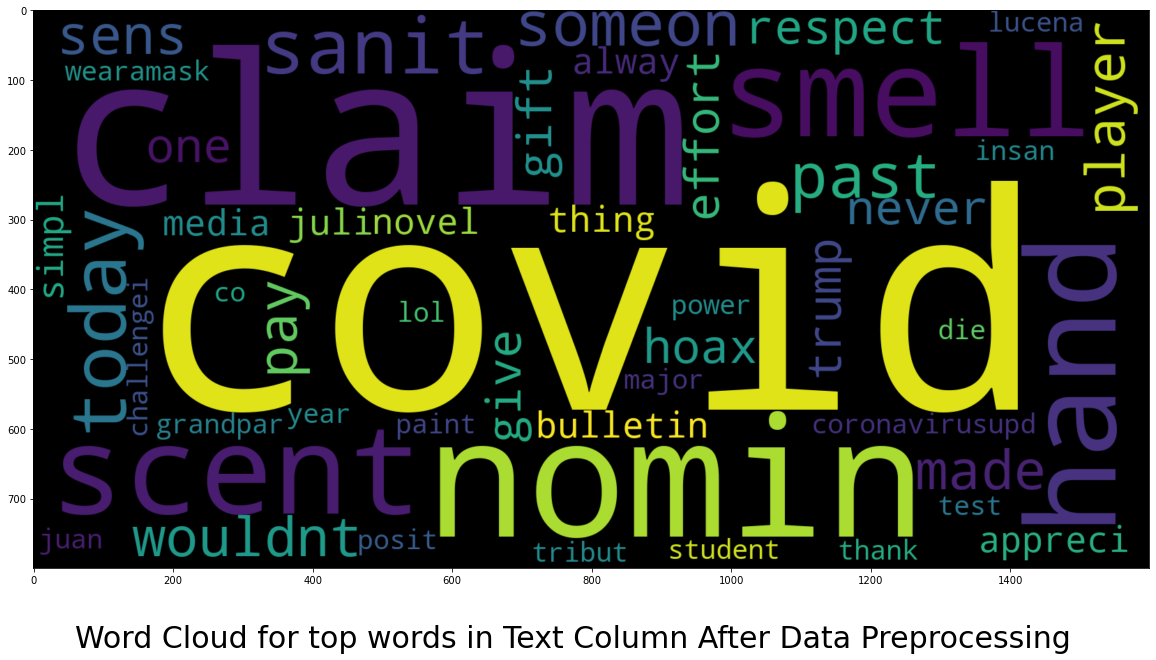

In [49]:
%%time
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 50 , width = 1600 , height = 800).generate(str(tweets_df['tidy_tweet']))
plt.suptitle('Word Cloud for top words in Text Column After Data Preprocessing', fontsize=30)
plt.subplots_adjust(top=2.3)
plt.imshow(wc , interpolation = 'bilinear')

## Distribution of N-grams After cleaning

In [50]:
unigrams = get_top_n_words(tweets_df["tidy_tweet"],(1,1),20)
 #Creating df
df_unigrams = pd.DataFrame(unigrams, columns = ['Text' , 'count'])

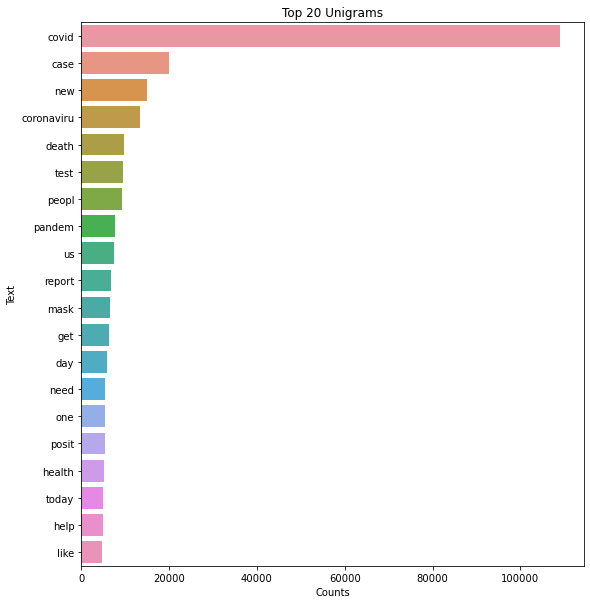

In [51]:
#Plotting
plt.figure(figsize=(9,10))
sns.barplot(df_unigrams["count"],df_unigrams["Text"])
plt.title("Top 20 Unigrams")
plt.xlabel("Counts")
plt.ylabel("Text")
plt.show()

In [52]:
bigrams = get_top_n_words(tweets_df["tidy_tweet"],(2,2),20)
#Creating df
df_bigrams = pd.DataFrame(bigrams, columns = ['Text' , 'count'])

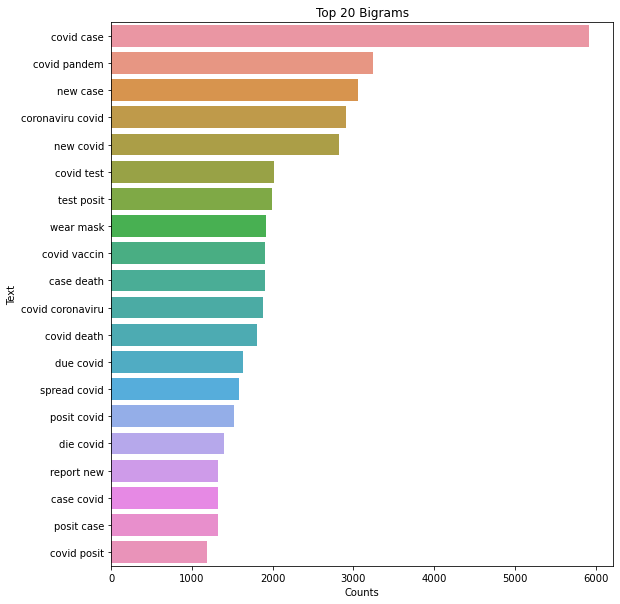

In [53]:
#Plotting
plt.figure(figsize=(9,10))
sns.barplot(df_bigrams["count"],df_bigrams["Text"])
plt.title("Top 20 Bigrams")
plt.xlabel("Counts")
plt.ylabel("Text")
plt.show()

In [54]:
trigrams = get_top_n_words(tweets_df["tidy_tweet"],(3,3),20)
#Creating df
df_trigrams = pd.DataFrame(trigrams, columns = ['Text' , 'count'])

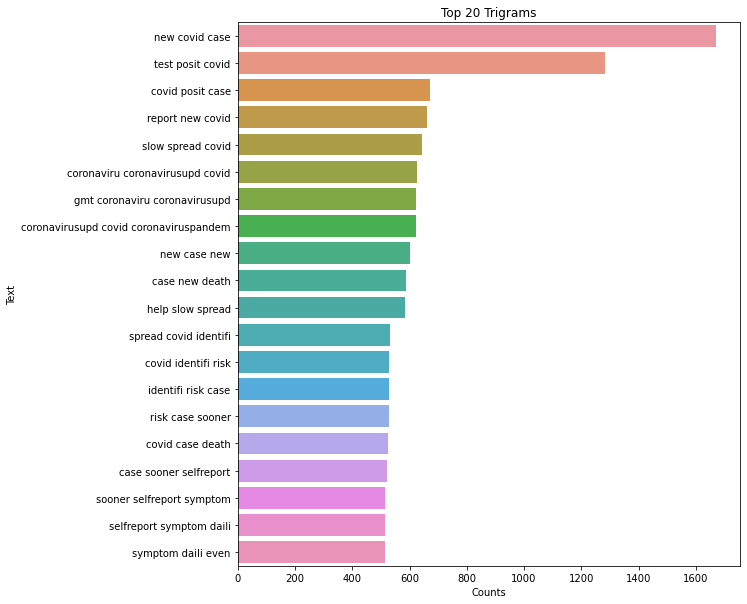

In [55]:
#Plotting
plt.figure(figsize=(9,10))
sns.barplot(df_trigrams["count"],df_trigrams["Text"])
plt.title("Top 20 Trigrams")
plt.xlabel("Counts")
plt.ylabel("Text")
plt.show()

In [56]:
from spellchecker import SpellChecker

In [57]:
# # creting a new function for spell checker
# spellings= SpellChecker()
# def spellingCorrections(text):
#     corrected_spellings = []
#     misspelled_words = spellings.unknown(text.split())
#     for word in text.split():
#         if word in misspelled_words:
#             corrected_spellings.append(spellings.correction(word))
#         else:
#             corrected_spellings.append(word)
#     return " ".join(corrected_spellings)

In [58]:
# %%time
# tweets_df["FinaTidyTweets"]=tweets_df["EmoticonsAndEmojisIntoWords"].apply(spellingCorrections)

## Sentiment Analysis 

In [59]:
# Importing sentiment Anaysler from Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [60]:
# declaring SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()

In [61]:
# creating new column for the compound sentiment Analysis Score .
tweets_df['Sentiment_scores'] =tweets_df["tidy_tweet"].apply(lambda tweet: sid.polarity_scores(tweet))


In [62]:
# creating new column for the compound sentiment Analysis Score
tweets_df['compound'] = tweets_df['Sentiment_scores'].apply(lambda x:x['compound'])

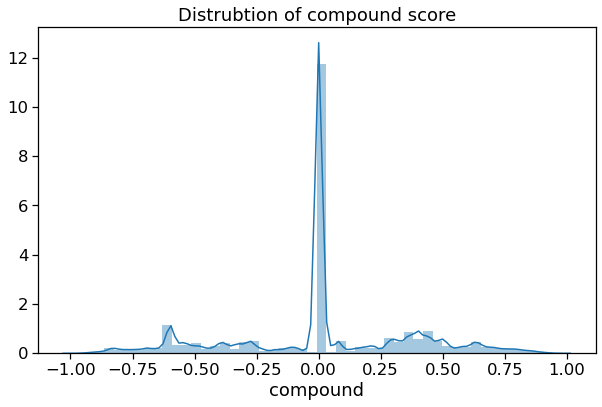

In [63]:
# plotting sentiments compund score.
plt.figure(figsize=(10,6))
sns.set_context(context='notebook',font_scale=1.5)
sns.distplot(tweets_df['compound'])
plt.title('Distrubtion of compound score')
plt.show()



In [64]:
# creating new column to add the sentiment of postive, negative and neutral to data.
tweets_df['Sentiment'] = tweets_df['compound'].apply(lambda score: 'positive' if score >=0.05 else 'negative' 
                                                           if score <=-0.05 else 'neutral')


In [65]:
tweets_df.head(10)

user_name               user_location  \
0                             ᏉᎥ☻լꂅϮ               United States   
1                      Tom Basile 🇺🇸               United States   
2                    Time4fisticuffs               United States   
3                        ethel mertz               United States   
4                           DIPR-J&K           Jammu and Kashmir   
5                   🎹 Franz Schubert                 Новоро́ссия   
6                       hr bartender             Gainesville, FL   
7                     Derbyshire LPC                         NaN   
8                  Prathamesh Bendre                         NaN   
9  Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺  👇🏻location at link below👇🏻   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   
5  2020-07-25 12:27:06  #coronavirus #covid19 deaths continue to rise....   
6  2020-07-25 12:27:03  How #COVID19 Will Change Work in General (and ...   
7  2020-07-25 12:27:00  You now have to wear face coverings when out s...   
8  2020-07-25 12:26:59  Praying for good health and recovery of @Chouh...   
9  2020-07-25 12:26:54  POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...   

                            hashtags  n_of_texts  \
0                                NaN         140   
1                                NaN         140   
2                        ['COVID19']         140   
3                        ['COVID19']         139   
4  ['CoronaVirusUpdates', 'COVID19']         138   
5         ['coronavirus', 'covid19']         140   
6          ['COVID19', 'Recruiting']         130   
7                                NaN         135   
8       ['covid19', 'covidPositive']          81   
9      ['HurricaneHanna', 'COVID19']         134   

                                  EmoticonsIntoWords  \
0  If I smelled the scent of hand sanitizers toda...   
1  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  @brookbanktv The one gift #COVID19 has give me...   
4  25 July : Media Bulletin on Novel #CoronaVirus...   
5  #coronavirus #covid19 deaths continue to rise....   
6  How #COVID19 Will Change Work in General (and ...   
7  You now have to wear face coverings when out s...   
8  Praying for good health and recovery of @Chouh...   
9  POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...   

                         EmoticonsAndEmojisIntoWords  \
0  If I smelled the scent of hand sanitizers toda...   
1  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  @brookbanktv The one gift #COVID19 has give me...   
4  25 July : Media Bulletin on Novel #CoronaVirus...   
5  #coronavirus #covid19 deaths continue to rise....   
6  How #COVID19 Will Change Work in General (and ...   
7  You now have to wear face coverings when out s...   
8  Praying for good health and recovery of @Chouh...   
9  POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...   

                                         Cleanedtext  \
0  if i smelled the scent of hand sanitizers toda...   
1  hey   and   wouldnt it have made more sense to...   
2     trump never once claimed covid was a hoax w...   
3   the one gift covid has give me is an apprecia...   
4   july  media bulletin on novel coronavirusupda...   
5  coronavirus covid deaths continue to rise its ...   
6  how covid will change work in general and recr...   
7  you now have to wear face coverings when out s...   
8  praying for good health and recovery of  covid...   
9  pope as god  prophet sadhu sundar selvaraj wat...   

      

In [66]:
# checking distribution of sentiments.
tweets_df["Sentiment"].value_counts(normalize=True)

neutral     0.460242
positive    0.298485
negative    0.241273
Name: Sentiment, dtype: float64

In [67]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   user_name                    179108 non-null  object 
 1   user_location                142337 non-null  object 
 2   date                         179108 non-null  object 
 3   text                         179108 non-null  object 
 4   hashtags                     127774 non-null  object 
 5   n_of_texts                   179108 non-null  int64  
 6   EmoticonsIntoWords           179108 non-null  object 
 7   EmoticonsAndEmojisIntoWords  179108 non-null  object 
 8   Cleanedtext                  179108 non-null  object 
 9   tidy_tweet                   179108 non-null  object 
 10  Sentiment_scores             179108 non-null  object 
 11  compound                     179108 non-null  float64
 12  Sentiment                    179108 non-null  object 
dtyp

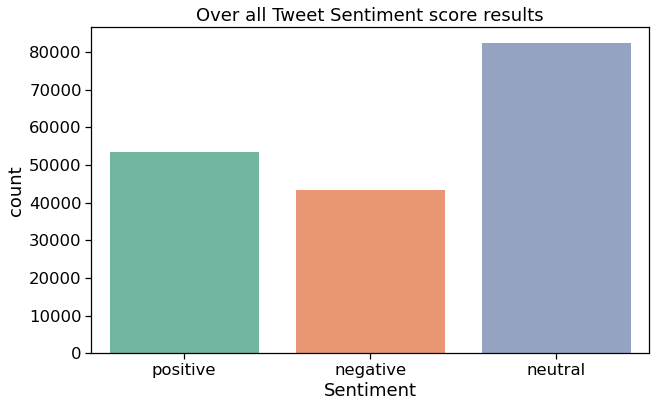

In [68]:
# plotting the distribution of sentiments
plt.figure(figsize=(10,6))
sns.set_context(context='notebook',font_scale=1.5)
sns.countplot(tweets_df['Sentiment'],palette='Set2')
plt.title('Over all Tweet Sentiment score results');

In [69]:
tweets_df['Sentiment'].value_counts()
tweets_df['Sentiment'].value_counts(normalize=True)



neutral     0.460242
positive    0.298485
negative    0.241273
Name: Sentiment, dtype: float64

In [70]:
#Top 5 countries and their sentiment scores
Australia_score =tweets_df[tweets_df["user_location"].str.contains('Australia',na=False)]['Sentiment']
America_score =tweets_df[tweets_df["user_location"].str.contains('United States',na=False)]['Sentiment']
UK_score =tweets_df[tweets_df["user_location"].str.contains('United Kingdom',na=False)]['Sentiment']
Canada_score =tweets_df[tweets_df["user_location"].str.contains('Canada',na=False)]['Sentiment']
India_score =tweets_df[tweets_df["user_location"].str.contains('India',na=False)]['Sentiment']
India_score =tweets_df[tweets_df["user_location"].str.contains('India',na=False)]['Sentiment']

In [71]:
Countries =pd.DataFrame({"Australia":Australia_score,'United_States':America_score,'United_Kingdom':UK_score ,
                         'Canada':Canada_score,'India':India_score})
Countries_df =pd.melt(Countries)
Countries_df.columns = ['Country','Sentiment_Analysis']

In [72]:
Countries.head(5)

Australia United_States United_Kingdom Canada    India
0        NaN      positive            NaN    NaN      NaN
1        NaN      positive            NaN    NaN      NaN
2        NaN      positive            NaN    NaN      NaN
3        NaN      positive            NaN    NaN      NaN
14       NaN           NaN            NaN    NaN  neutral

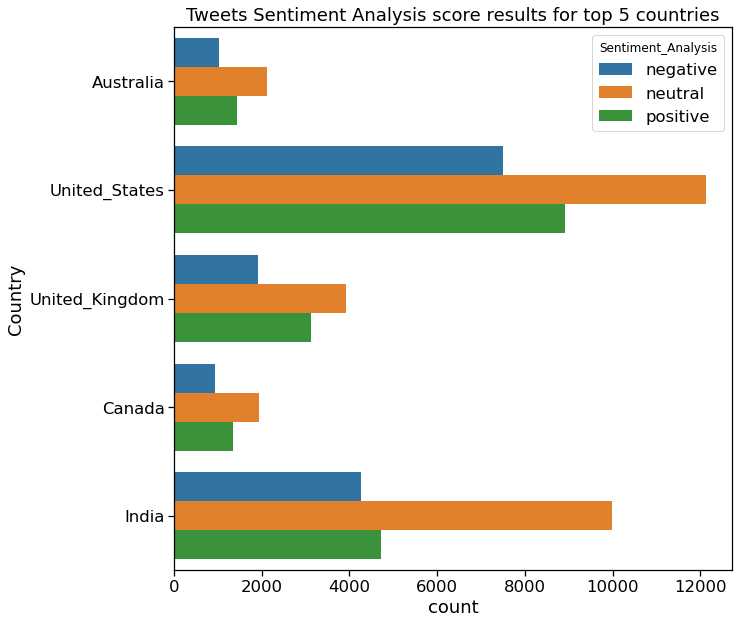

In [73]:
# plotting the sentiments of top 5 countries

plt.figure(figsize=(10,10))
plt.title('Tweets Sentiment Analysis score results for top 5 countries')
sns.countplot(data=Countries_df, y='Country', hue='Sentiment_Analysis');

Wall time: 27.4 s


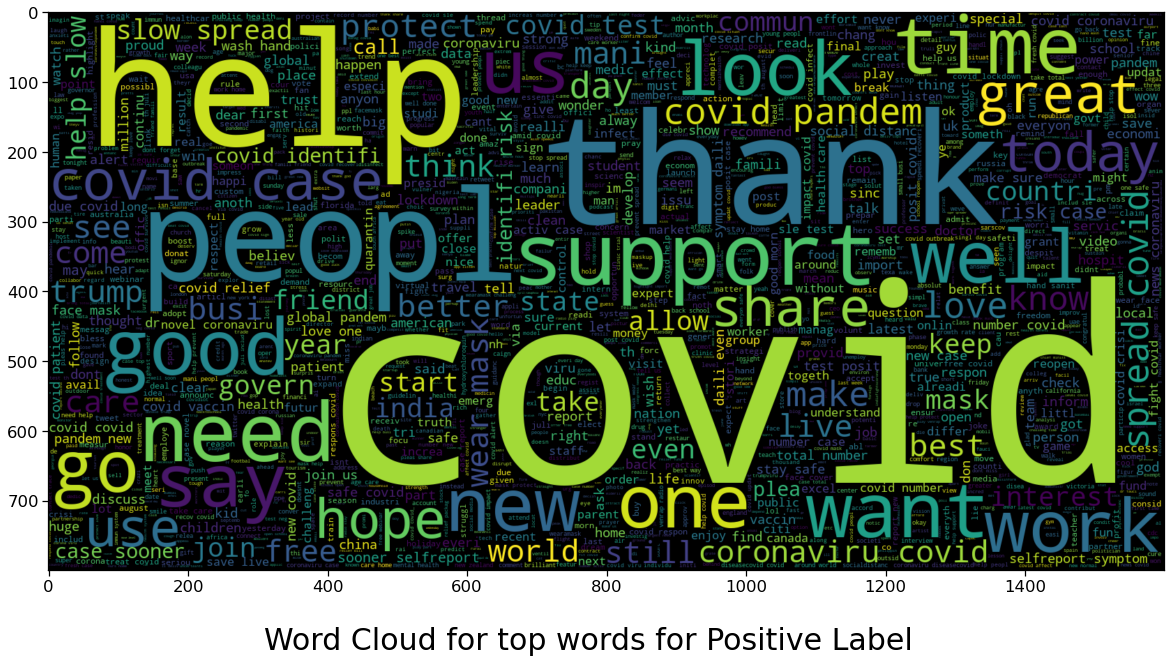

In [74]:
%%time
plt.figure(figsize = (20,20)) # Joy Emotion word cloud  
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tweets_df[tweets_df.Sentiment == "positive"].tidy_tweet))
plt.imshow(wc , interpolation = 'bilinear')
plt.suptitle('Word Cloud for top words for Positive Label', fontsize=30)
plt.subplots_adjust(top=2.3)

Wall time: 30.9 s


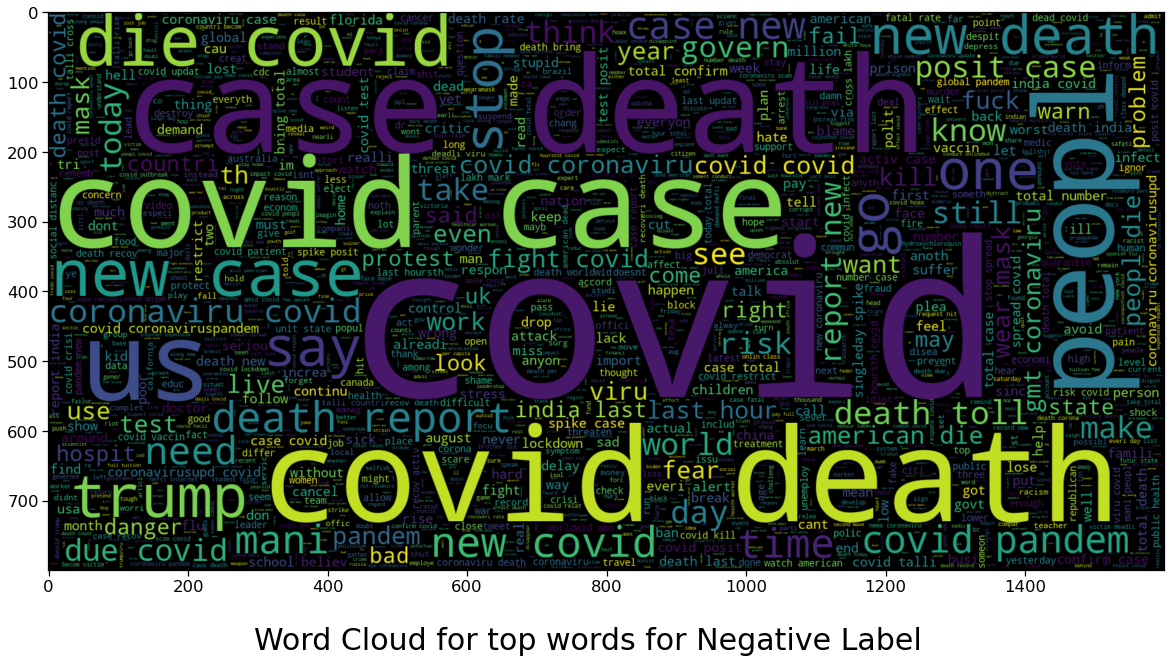

In [75]:
%%time
plt.figure(figsize = (20,20)) # Joy Emotion word cloud  
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tweets_df[tweets_df.Sentiment == "negative"].tidy_tweet))
plt.imshow(wc , interpolation = 'bilinear')
plt.suptitle('Word Cloud for top words for Negative Label', fontsize=30)
plt.subplots_adjust(top=2.3)


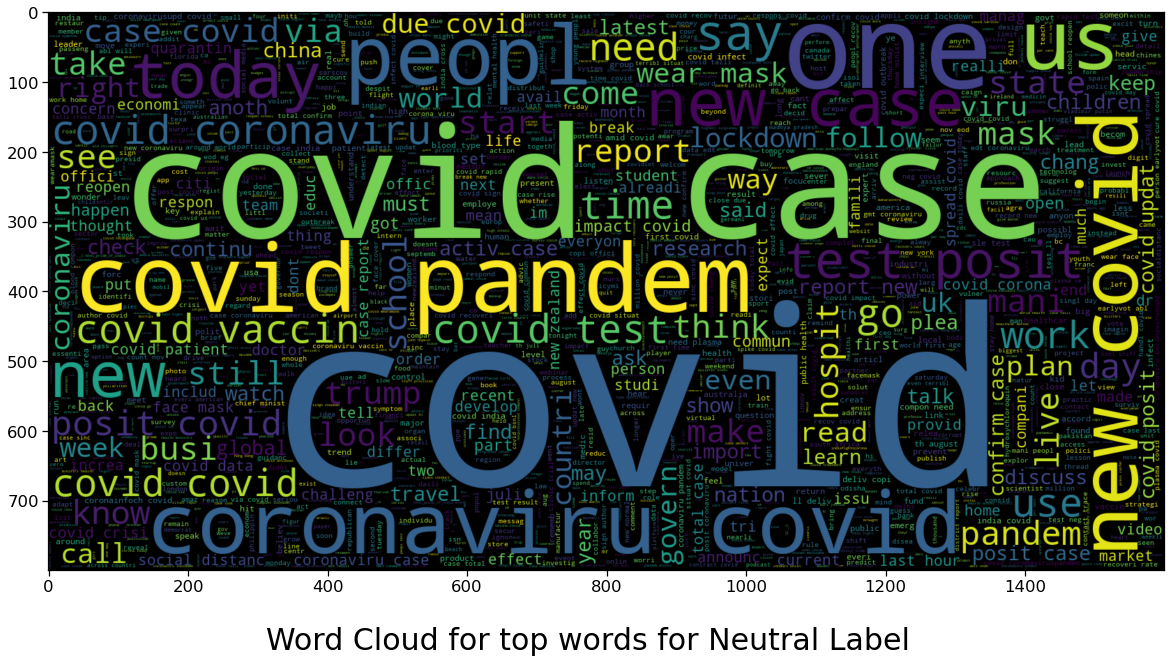

In [76]:
# df_unigrams = pd.DataFrame(%%time
plt.figure(figsize = (20,20)) # Joy Emotion word cloud  
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tweets_df[tweets_df.Sentiment == "neutral"].tidy_tweet))
plt.imshow(wc , interpolation = 'bilinear')
plt.suptitle('Word Cloud for top words for Neutral Label', fontsize=30)
plt.subplots_adjust(top=2.3)

In [77]:
%%time
# bag-of-words feature matrix
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range = (1,3))

X = vectorizer.fit_transform(tweets_df["tidy_tweet"])
y = tweets_df["Sentiment"]

Wall time: 15.1 s


In [80]:
%%time
# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
#splitting the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

Wall time: 69.8 ms


## Multinomial Naive Bayes

In [81]:
%%time
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

Wall time: 562 ms


MultinomialNB()

In [82]:
%%time
y_pred = classifier.predict(X_test)

print("Test accuracy: ",classifier.score(X_test, y_test))
print("Training accuracy: ",classifier.score(X_train, y_train))
# classification report
c_report=classification_report(y_test,y_pred)
print("Classification Report:\n",c_report)

Test accuracy:  0.8171514711629725
Training accuracy:  0.9904805773069246
Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.80      0.78      8559
     neutral       0.90      0.81      0.85     16588
    positive       0.75      0.85      0.80     10675

    accuracy                           0.82     35822
   macro avg       0.81      0.82      0.81     35822
weighted avg       0.82      0.82      0.82     35822

Wall time: 918 ms


## Support Vector Machine

In [83]:
%%time
#on CountVectorizer
from sklearn.svm import LinearSVC
LSVC = LinearSVC()

LSVC.fit(X_train, y_train)
y_pred = LSVC.predict(X_test)
print("Test accuracy: ",LSVC.score(X_test, y_test))
print("Training accuracy: ",LSVC.score(X_train, y_train))
c_report=classification_report(y_test,y_pred)
print("Classification Report:\n",c_report)


Test accuracy:  0.951593992518564
Training accuracy:  0.9999232304621526
Classification Report:
               precision    recall  f1-score   support

    negative       0.94      0.91      0.92      8559
     neutral       0.96      0.97      0.97     16588
    positive       0.94      0.95      0.95     10675

    accuracy                           0.95     35822
   macro avg       0.95      0.94      0.95     35822
weighted avg       0.95      0.95      0.95     35822

Wall time: 1min 39s


## Decision Tree

In [84]:
%%time
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

print("Test accuracy: ",DTC.score(X_test, y_test))
print("Training accuracy: ",DTC.score(X_train, y_train))
c_report=classification_report(y_test,y_pred)
print("Classification Report:\n",c_report)

Test accuracy:  0.9474066216291664
Training accuracy:  0.9999441676088383
Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.91      0.91      8559
     neutral       0.98      0.97      0.98     16588
    positive       0.92      0.94      0.93     10675

    accuracy                           0.95     35822
   macro avg       0.94      0.94      0.94     35822
weighted avg       0.95      0.95      0.95     35822

Wall time: 25min 52s


In [85]:
%%time
# TF-IDF feature matrix
tfidf_vectorizer = TfidfVectorizer(ngram_range = (1,3))

X = tfidf_vectorizer.fit_transform(tweets_df["tidy_tweet"])
y = tweets_df["Sentiment"]

Wall time: 15.4 s


In [86]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


Wall time: 69.8 ms


## Multinomial Naive Bayes

In [87]:
%%time
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

Wall time: 554 ms


MultinomialNB()

In [88]:
%%time
y_pred = classifier.predict(X_test)
print("Test accuracy: ",classifier.score(X_test, y_test))
print("Training accuracy: ",classifier.score(X_train, y_train))
c_report=classification_report(y_test,y_pred)
print("Classification Report:\n",c_report)

Test accuracy:  0.7124113673161744
Training accuracy:  0.9323451000097707
Classification Report:
               precision    recall  f1-score   support

    negative       0.95      0.41      0.57      8559
     neutral       0.64      0.99      0.77     16588
    positive       0.89      0.53      0.66     10675

    accuracy                           0.71     35822
   macro avg       0.82      0.64      0.67     35822
weighted avg       0.79      0.71      0.69     35822

Wall time: 895 ms


## Support Vector Machine

In [89]:
%%time
#on tf-idf
from sklearn.svm import LinearSVC
LSVC = LinearSVC()

LSVC.fit(X_train, y_train)
y_pred = LSVC.predict(X_test)
print("Test accuracy: ",LSVC.score(X_test, y_test))
print("Training accuracy: ",LSVC.score(X_train, y_train))
c_report=classification_report(y_test,y_pred)
print("Classification Report:\n",c_report)

Test accuracy:  0.9275863994193513
Training accuracy:  0.9992323046215261
Classification Report:
               precision    recall  f1-score   support

    negative       0.94      0.85      0.89      8559
     neutral       0.92      0.98      0.95     16588
    positive       0.93      0.92      0.93     10675

    accuracy                           0.93     35822
   macro avg       0.93      0.91      0.92     35822
weighted avg       0.93      0.93      0.93     35822

Wall time: 9.36 s


## Decision Tree

In [90]:
%%time
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

print("Test accuracy: ",DTC.score(X_test, y_test))
print("Training accuracy: ",DTC.score(X_train, y_train))
c_report=classification_report(y_test,y_pred)
print("Classification Report:\n",c_report)

Test accuracy:  0.9429959242923344
Training accuracy:  0.9999441676088383
Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.90      0.90      8559
     neutral       0.98      0.97      0.98     16588
    positive       0.91      0.93      0.92     10675

    accuracy                           0.94     35822
   macro avg       0.93      0.93      0.93     35822
weighted avg       0.94      0.94      0.94     35822

Wall time: 25min 51s


# Second DataSet


In [94]:
# reading the second file 
df = pd.read_csv('finalSentimentdata.csv')

In [95]:
# looking at top 5 records of the seond dataset.
df.head(5)

Unnamed: 0 sentiment                                               text
0        3204       sad  agree the poor in india are treated badly thei...
1        1431       joy  if only i could have spent the with this cutie...
2         654       joy  will nature conservation remain a priority in ...
3        2530       sad  coronavirus disappearing in italy show this to...
4        2296       sad  uk records lowest daily virus death toll since...

In [96]:
# dropping unnamed column 
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [97]:
# looking if changes has been applied 
df.head(5)

sentiment                                               text
0       sad  agree the poor in india are treated badly thei...
1       joy  if only i could have spent the with this cutie...
2       joy  will nature conservation remain a priority in ...
3       sad  coronavirus disappearing in italy show this to...
4       sad  uk records lowest daily virus death toll since...

In [98]:
# number of rows and columns 
df.shape

(3090, 2)

In [99]:
# looking at types of these two columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  3090 non-null   object
 1   text       3090 non-null   object
dtypes: object(2)
memory usage: 48.4+ KB


In [100]:
# looking at distrubtions of emotions
df.sentiment.value_counts()

fear     801
sad      795
anger    767
joy      727
Name: sentiment, dtype: int64

In [101]:
# looking at perecentage distrubtion
df.sentiment.value_counts(normalize=True)

fear     0.259223
sad      0.257282
anger    0.248220
joy      0.235275
Name: sentiment, dtype: float64

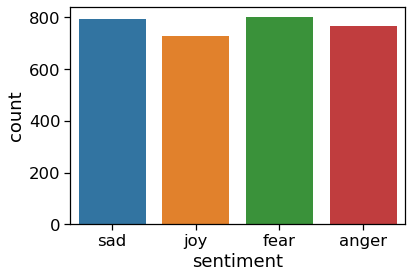

In [102]:
# Viuslisaing teh ditrubtion 
sns.countplot(df['sentiment'])

In [105]:
# Applying the methods to the text columns
df["EmojisEmoticonsConverted"]=df["text"].apply(convert_emoticons)
df["EmojisEmoticonsConverted"]=df["EmojisEmoticonsConverted"].apply(convert_emojis)

In [106]:
# Applying the cleancolumn method for the new dataset.
df["Cleanedtweets"]=df["EmojisEmoticonsConverted"].apply(lambda x: cleanTextColumn(x))

In [107]:
stop_words = set(stopwords.words('english'))
CleanedTexts = df["Cleanedtweets"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [108]:
CleanedTexts

0       agree poor india treated badly poors seek livi...
1       could spent cutie vc sakshi__s n g h coast cro...
2       nature conservation remain priority post coron...
3       coronavirus disappearing italy show intellectu...
4       uk records lowest daily virus death toll since...
                              ...                        
3085    today pm year old bangladeshi male admitted tr...
3086    corona virus implore cease activity april st s...
3087    issa date lockdown ends inshaallah corona tooc...
3088    death toll due covid rose jammu kashmir third ...
3089    rates become barrier poor people think cure tr...
Name: Cleanedtweets, Length: 3090, dtype: object

In [109]:
df.head()

sentiment                                               text  \
0       sad  agree the poor in india are treated badly thei...   
1       joy  if only i could have spent the with this cutie...   
2       joy  will nature conservation remain a priority in ...   
3       sad  coronavirus disappearing in italy show this to...   
4       sad  uk records lowest daily virus death toll since...   

                            EmojisEmoticonsConverted  \
0  agree the poor in india are treated badly thei...   
1  if only i could have spent the with this cutie...   
2  will nature conservation remain a priority in ...   
3  coronavirus disappearing in italy show this to...   
4  uk records lowest daily virus death toll since...   

                                       Cleanedtweets  
0  agree the poor in india are treated badly thei...  
1  if only i could have spent the with this cutie...  
2  will nature conservation remain a priority in ...  
3  coronavirus disappearing in italy show this to...  
4  uk records lowest daily virus death toll since...

In [110]:
tokenized_tweet = CleanedTexts.apply(lambda x: x.split())

In [111]:
tokenized_tweet.head()

0    [agree, poor, india, treated, badly, poors, se...
1    [could, spent, cutie, vc, sakshi__s, n, g, h, ...
2    [nature, conservation, remain, priority, post,...
3    [coronavirus, disappearing, italy, show, intel...
4    [uk, records, lowest, daily, virus, death, tol...
Name: Cleanedtweets, dtype: object

In [112]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [agre, poor, india, treat, badli, poor, seek, ...
1    [could, spent, cuti, vc, sakshi__, n, g, h, co...
2    [natur, conserv, remain, prioriti, post, coron...
3    [coronaviru, disappear, itali, show, intellect...
4    [uk, record, lowest, daili, viru, death, toll,...
Name: Cleanedtweets, dtype: object

In [113]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['tidy_tweet'] = tokenized_tweet

In [114]:
df.head(10)

sentiment                                               text  \
0       sad  agree the poor in india are treated badly thei...   
1       joy  if only i could have spent the with this cutie...   
2       joy  will nature conservation remain a priority in ...   
3       sad  coronavirus disappearing in italy show this to...   
4       sad  uk records lowest daily virus death toll since...   
5      fear  joe biden's coronavirus web address lands on a...   
6       sad  respected sir in our telangana all private tea...   
7      fear  so is also 20 times more lethal than influenza...   
8       sad  thull is passing the most dangerous and ultra ...   
9       sad  thull is passing the most dangerous and ultra ...   

                            EmojisEmoticonsConverted  \
0  agree the poor in india are treated badly thei...   
1  if only i could have spent the with this cutie...   
2  will nature conservation remain a priority in ...   
3  coronavirus disappearing in italy show this to...   
4  uk records lowest daily virus death toll since...   
5  joe biden's coronavirus web address lands on a...   
6  respected sir in our telangana all private tea...   
7  so is also 20 times more lethal than influenza...   
8  thull is passing the most dangerous and ultra ...   
9  thull is passing the most dangerous and ultra ...   

                                       Cleanedtweets  \
0  agree the poor in india are treated badly thei...   
1  if only i could have spent the with this cutie...   
2  will nature conservation remain a priority in ...   
3  coronavirus disappearing in italy show this to...   
4  uk records lowest daily virus death toll since...   
5  joe bidens coronavirus web address lands on a ...   
6  respected sir in our telangana all private tea...   
7  so is also  times more lethal than influenza t...   
8  thull is passing the most dangerous and ultra ...   
9  thull is passing the most dangerous and ultra ...   

                                          tidy_tweet  
0  agre poor india treat badli poor seek live sin...  
1  could spent cuti vc sakshi__ n g h coast cross...  
2  natur conserv remain prioriti post corona bang...  
3  coronaviru disappear itali show intellectu say...  
4  uk record lowest daili viru death toll sinc st...  
5  joe biden coronaviru web address land donat pa...  
6  respect sir telangana privat teacher lectur ho...  
7                   also time lethal influenza think  
8  thull pass danger ultra hazard situat histori ...  
9  thull pass danger ultra hazard situat histori ...

## Word Clouds of Emotions

Wall time: 14.5 s


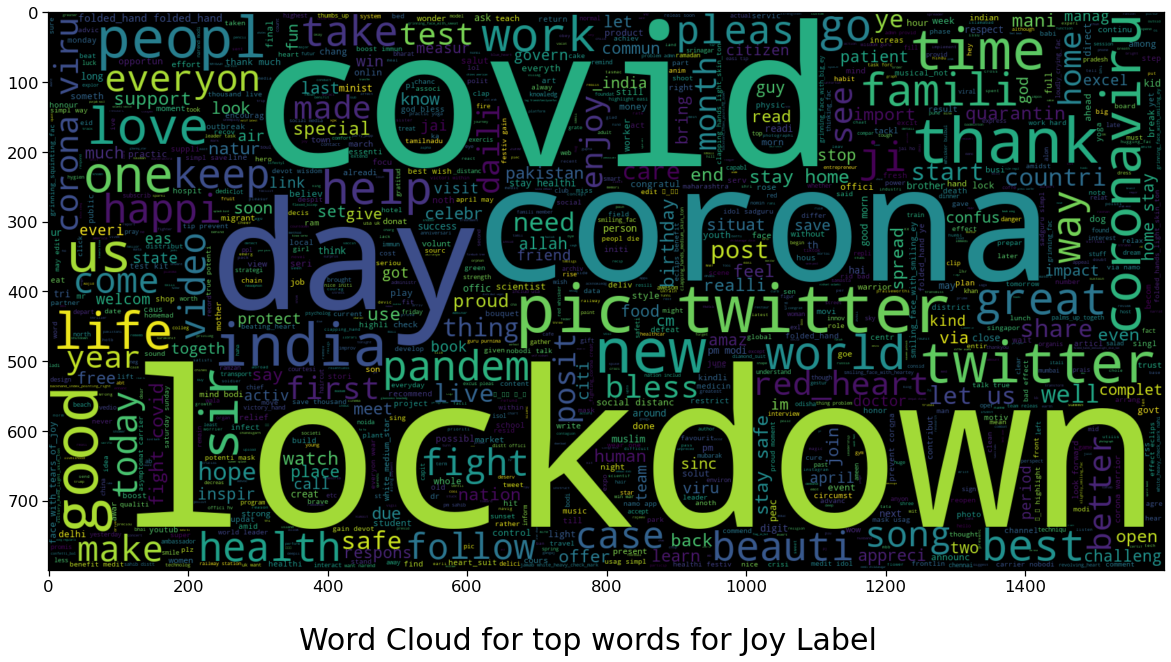

In [118]:
%%time
plt.figure(figsize = (20,20)) # Joy Emotion word cloud  
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == "joy"].tidy_tweet))
plt.imshow(wc , interpolation = 'bilinear')
plt.suptitle('Word Cloud for top words for Joy Label', fontsize=30)
plt.subplots_adjust(top=2.3)

Wall time: 23 s


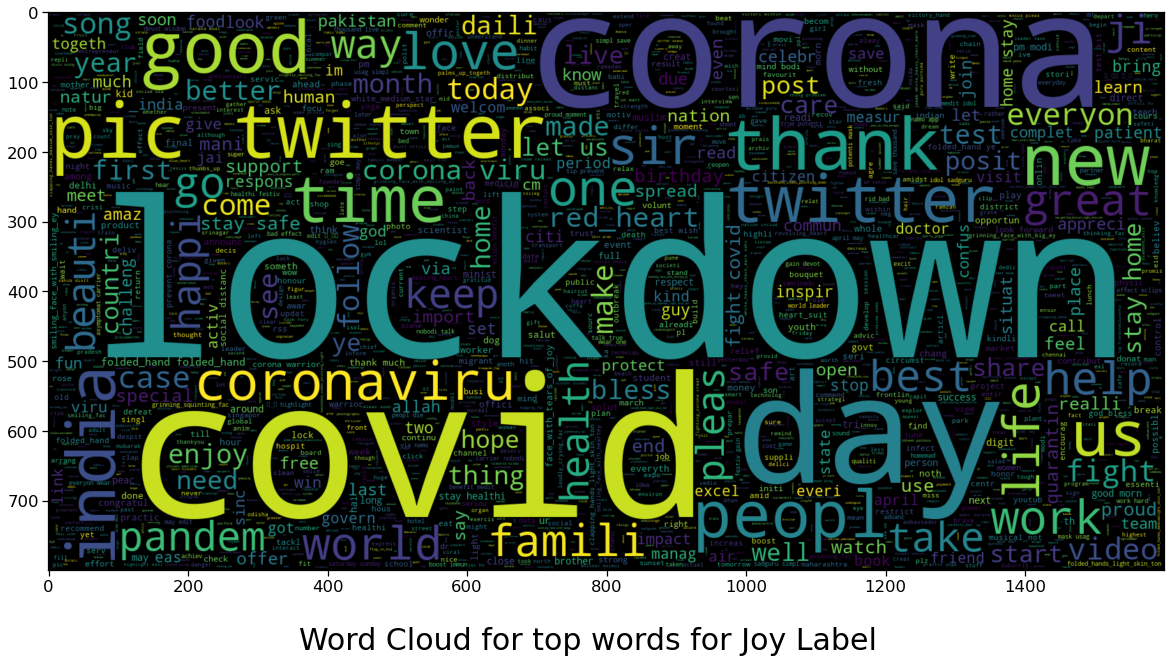

In [119]:
%%time
plt.figure(figsize = (20,20)) # Joy Emotion word cloud  
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == "joy"].tidy_tweet))
plt.imshow(wc , interpolation = 'bilinear')
plt.suptitle('Word Cloud for top words for Joy Label', fontsize=30)
plt.subplots_adjust(top=2.3)

Wall time: 21.9 s


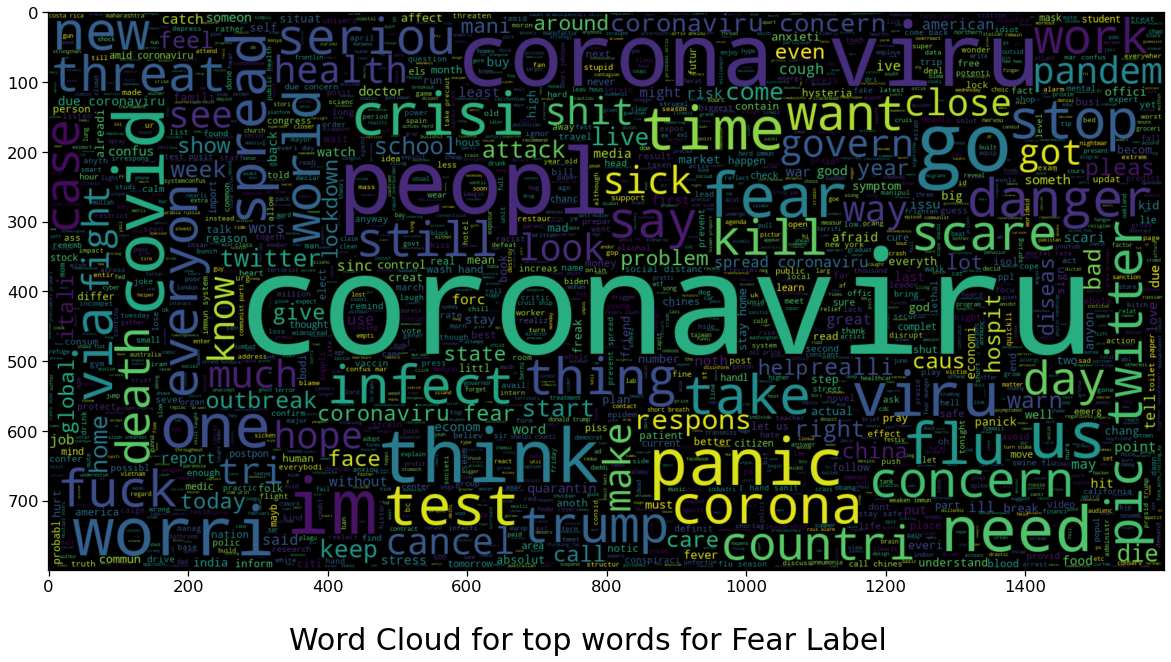

In [120]:
%%time
# Fear Emotion word cloud
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == "fear"].tidy_tweet))
plt.imshow(wc , interpolation = 'bilinear')
plt.suptitle('Word Cloud for top words for Fear Label', fontsize=30)
plt.subplots_adjust(top=2.3)

Wall time: 12.6 s


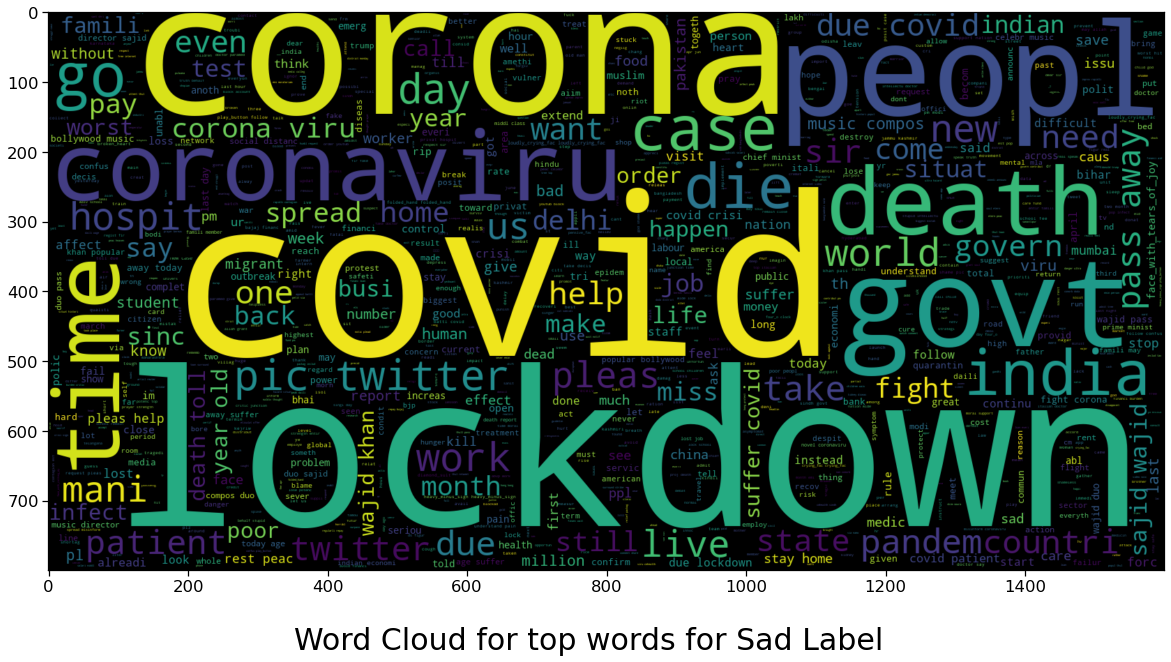

In [121]:
%%time
# Sad Emotion word cloud
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == "sad"].tidy_tweet))
plt.imshow(wc , interpolation = 'bilinear')
plt.suptitle('Word Cloud for top words for Sad Label', fontsize=30)
plt.subplots_adjust(top=2.3)

Wall time: 11 s


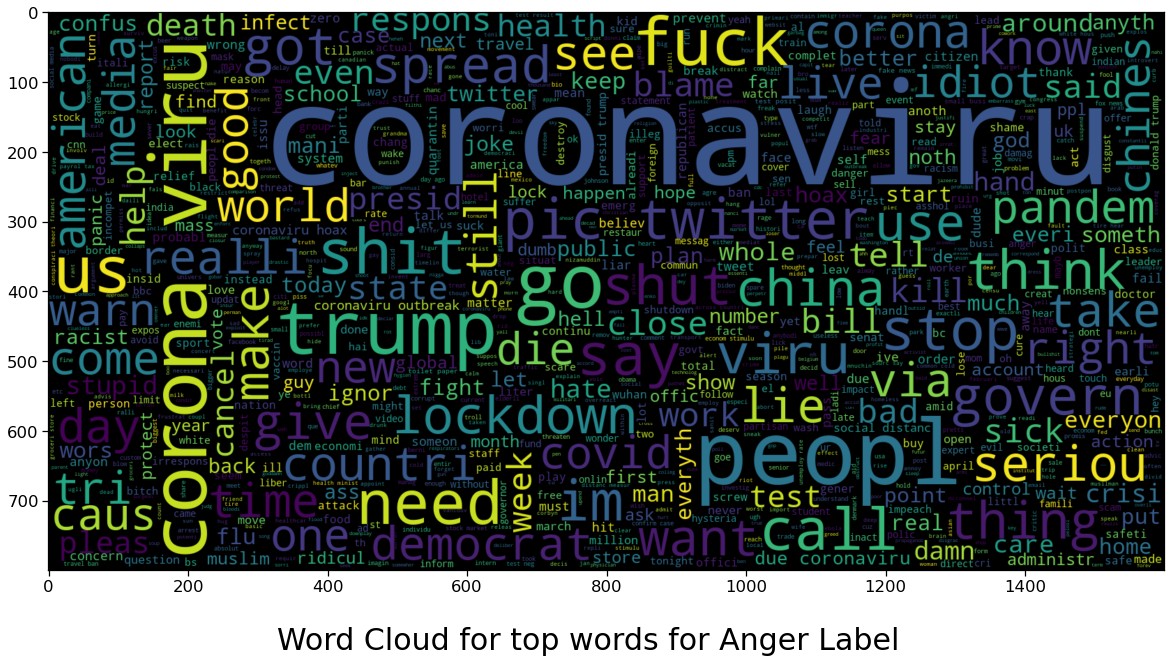

In [122]:
%%time
# angry Emotion word cloud
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == "anger"].tidy_tweet))
plt.imshow(wc , interpolation = 'bilinear')
plt.suptitle('Word Cloud for top words for Anger Label', fontsize=30)
plt.subplots_adjust(top=2.3)

## CountVectorizer

In [123]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(ngram_range = (1,2))

X = bow_vectorizer.fit_transform(df['tidy_tweet'])
y = df["sentiment"]

Wall time: 241 ms


In [124]:
y.shape

(3090,)

In [125]:
X.shape

(3090, 41216)

In [126]:
# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)


## Naive Bayes

In [127]:
# Naive Bayes Classification 

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [129]:
y_pred = classifier.predict(X_test)
c_report=classification_report(y_test,y_pred)

print("Test accuracy: ",classifier.score(X_test, y_test))
print("Training accuracy: ",classifier.score(X_train, y_train))
# classification report
print("Classification Report:\n",c_report)

Test accuracy:  0.6655879180151025
Training accuracy:  0.9935275080906149
Classification Report:
               precision    recall  f1-score   support

       anger       0.67      0.49      0.57       247
        fear       0.57      0.72      0.64       237
         joy       0.77      0.71      0.74       214
         sad       0.69      0.75      0.72       229

    accuracy                           0.67       927
   macro avg       0.68      0.67      0.67       927
weighted avg       0.67      0.67      0.66       927



## Support Vector Machine

In [130]:
#on CountVectorizer
from sklearn.svm import LinearSVC
# Linear Support Vector Classifier
LSVC = LinearSVC()

LSVC.fit(X_train, y_train)
y_pred = LSVC.predict(X_test)
print("Test accuracy: ",LSVC.score(X_test, y_test))
print("Training accuracy: ",LSVC.score(X_train, y_train))
# classification report
c_report=classification_report(y_test,y_pred)
print("Classification Report:\n",c_report)

Test accuracy:  0.6526429341963322
Training accuracy:  0.9995376791493297
Classification Report:
               precision    recall  f1-score   support

       anger       0.63      0.51      0.56       247
        fear       0.64      0.61      0.62       237
         joy       0.61      0.83      0.70       214
         sad       0.75      0.68      0.71       229

    accuracy                           0.65       927
   macro avg       0.66      0.66      0.65       927
weighted avg       0.66      0.65      0.65       927



## Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

print("Test accuracy: ",DTC.score(X_test, y_test))
print("Training accuracy: ",DTC.score(X_train, y_train))
# classification report
c_report=classification_report(y_test,y_pred)
print("Classification Report:\n",c_report)

Test accuracy:  0.5382955771305286
Training accuracy:  1.0
Classification Report:
               precision    recall  f1-score   support

       anger       0.46      0.48      0.47       247
        fear       0.50      0.48      0.49       237
         joy       0.59      0.68      0.63       214
         sad       0.62      0.53      0.57       229

    accuracy                           0.54       927
   macro avg       0.54      0.54      0.54       927
weighted avg       0.54      0.54      0.54       927



## RandomFores

In [132]:
from sklearn.ensemble import RandomForestClassifier #
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print("Test accuracy: ",rf.score(X_test, y_test))
print("Training accuracy: ",rf.score(X_train, y_train))
# classification report
c_report=classification_report(y_test,y_pred)
print("Classification Report:\n",c_report)

Test accuracy:  0.6030204962243797
Training accuracy:  1.0
Classification Report:
               precision    recall  f1-score   support

       anger       0.51      0.64      0.57       247
        fear       0.64      0.43      0.52       237
         joy       0.59      0.78      0.67       214
         sad       0.74      0.57      0.64       229

    accuracy                           0.60       927
   macro avg       0.62      0.61      0.60       927
weighted avg       0.62      0.60      0.60       927



## TFIDF

In [133]:
# TF-IDF feature matrix
tfidf_vectorizer = TfidfVectorizer(ngram_range = (1,2))

X = tfidf_vectorizer.fit_transform(df['tidy_tweet'])
y = df["sentiment"]


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


## Naive Bayes

In [135]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [136]:
y_pred = classifier.predict(X_test)
print("Test accuracy: ",classifier.score(X_test, y_test))
print("Training accuracy: ",classifier.score(X_train, y_train))
# classification report
# classification report
c_report=classification_report(y_test,y_pred)
print("Classification Report:\n",c_report)

Test accuracy:  0.6455368693402329
Training accuracy:  0.9965472593871385
Classification Report:
               precision    recall  f1-score   support

       anger       0.75      0.38      0.50       199
        fear       0.53      0.78      0.63       196
         joy       0.87      0.62      0.73       185
         sad       0.62      0.81      0.70       193

    accuracy                           0.65       773
   macro avg       0.69      0.65      0.64       773
weighted avg       0.69      0.65      0.64       773



## Support Vector Machine

In [137]:
#on tf-idf
from sklearn.svm import LinearSVC
LSVC = LinearSVC()

LSVC.fit(X_train, y_train)
y_pred = LSVC.predict(X_test)
print("Test accuracy: ",LSVC.score(X_test, y_test))
print("Training accuracy: ",LSVC.score(X_train, y_train))
# classification report
c_report=classification_report(y_test,y_pred)
print("Classification Report:\n",c_report)

Test accuracy:  0.703751617076326
Training accuracy:  0.9995684074233924
Classification Report:
               precision    recall  f1-score   support

       anger       0.65      0.58      0.61       199
        fear       0.66      0.64      0.65       196
         joy       0.72      0.85      0.78       185
         sad       0.78      0.75      0.77       193

    accuracy                           0.70       773
   macro avg       0.70      0.71      0.70       773
weighted avg       0.70      0.70      0.70       773



## Decision Tree

In [138]:

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_pred = DTC.predict(X_test)

print("Test accuracy: ",DTC.score(X_test, y_test))
print("Training accuracy: ",DTC.score(X_train, y_train))
# classification report
# classification report
c_report=classification_report(y_test,y_pred)
print("Classification Report:\n",c_report)

Test accuracy:  0.5342820181112549
Training accuracy:  1.0
Classification Report:
               precision    recall  f1-score   support

       anger       0.44      0.49      0.46       199
        fear       0.52      0.49      0.51       196
         joy       0.60      0.61      0.60       185
         sad       0.60      0.55      0.58       193

    accuracy                           0.53       773
   macro avg       0.54      0.54      0.54       773
weighted avg       0.54      0.53      0.54       773



## RandomForestClassifier

In [139]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
# rf_accuracy = np.mean(predicted2 == y_test) * 100
# print(rf_accuracy)
print("Test accuracy: ",rf.score(X_test, y_test))
print("Training accuracy: ",rf.score(X_train, y_train))
# classification report
c_report=classification_report(y_test,y_pred)
print("Classification Report:\n",c_report)

Test accuracy:  0.6326002587322122
Training accuracy:  1.0
Classification Report:
               precision    recall  f1-score   support

       anger       0.50      0.67      0.57       199
        fear       0.62      0.42      0.50       196
         joy       0.69      0.79      0.74       185
         sad       0.78      0.65      0.71       193

    accuracy                           0.63       773
   macro avg       0.65      0.63      0.63       773
weighted avg       0.65      0.63      0.63       773

